In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
from utils import unit

In [12]:
def UVvis(*args, label):
    in_num = len(args)//2
    assert in_num == len(label), "input data and label must have same length"
    minx = np.inf
    maxx = -np.inf
    for i in range(in_num):
        if min(args[2*i]) < minx:
            minx = min(args[2*i])
        if max(args[2*i]) > maxx:
            maxx = max(args[2*i])
    x = np.linspace(minx - 25, maxx + 25, 1000)
    y = np.zeros((x.shape[0], in_num))

    def gaussian(x, x0, A, sigma=8):
        return A * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2))

    for i in range(in_num):
        for pos, height in zip(args[2*i], args[2*i+1]):
            y[:, i] += gaussian(x, pos, height)

    fig, ax = plt.subplots(figsize=(8, 5))
    colors = rcParams["axes.prop_cycle"].by_key()["color"]
    for i, l, c in zip(range(in_num), label, colors):
        ax.plot(x, y[:, i], color=c, lw=1.5, label=l)
    # peak position
    # for i, c in zip(range(in_num), colors):
    #     for pos, height in zip(args[2*i], args[2*i+1]):
    #         ax.vlines(pos, 0, height, color=c, linestyle="dashed", alpha=0.6)
    for pos, height in zip(args[0], args[1]):
        ax.vlines(pos, 0, height, color=colors[0], linestyle="dashed", alpha=0.6)

    # ax.set_xlim(200, 450)
    # ax.set_ylim(-0.005, 0.3)
    ax.set_xlabel("wavelength (nm)", fontsize=15)
    ax.set_ylabel("oscillator strength", fontsize=15)
    # ax.set_title("Spectrum", fontsize=16)
    ax.legend(fontsize=15)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis="both", which="major", labelsize=15)
    ax.grid(True, linestyle="--", alpha=0.5)

    plt.show()
    fig.savefig('mol_in_solvents_gopt-UVspec' + '.svg', dpi=600, bbox_inches='tight')

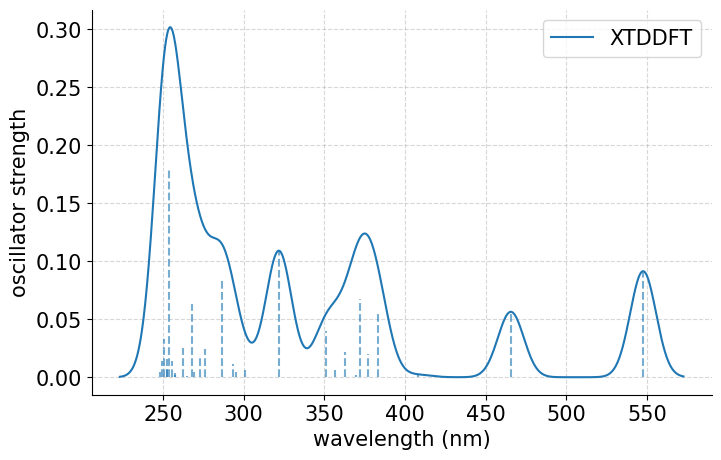

In [14]:
# in .csv file, first column is wavelength (unit is Angstrom), second column oscillator strength in length form
# if first column is energy (unit is eV), use `unit.eVxnm` transform to wavelength. Also energy unit is Hartree can use `unit.ha2eV` transform to eV then transform to wavelength
file = '../sTDA/result/czbtm/'
mol = ''
solvent = 'vacuum-'
XTDDFT = pd.read_csv(file+mol+solvent+'XTDDFT.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
e4 = XTDDFT[:40, 0]
os4 = XTDDFT[:40, 1]
# e4 = unit.eVxnm / e4
# X = pd.read_csv(file+mol+solvent+'XTDDFT20180601.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
# e0 = X[:, 0]
# os0 = X[:, 1]
# e0 = unit.eVxnm / e0
# Xs = pd.read_csv(file+mol+solvent+'XsTDA.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
# e1 = Xs[:,0]
# os1 = Xs[:,1]
# e1 = unit.eVxnm / e1
UTDDFT = pd.read_csv(file+mol+solvent+'UTDDFT.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
e5 = UTDDFT[:40, 0]
os5 = UTDDFT[:40, 1]
# U = pd.read_csv(file+mol+solvent+'UTDA.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
# e2 = U[:, 0]
# os2 = U[:, 1]
# Us = pd.read_csv(file+mol+solvent+'UsTDAsmd.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
# e3 = Us[:,0]
# os3 = Us[:,1]
# UVvis(e4, os4, e0,os0,e1,os1, label=['XTDDFT', 'XTDA', 'XsTDA'])
UVvis(e4, os4, label=['XTDDFT'])
# UVvis(e5,os5,e2,os2,e3,os3, label=['UTDDFT','UTDA', 'UsTDA'])